### Uyen Pham
### 508-Final Project
### Preliminary processing

#### +++++++++++++++++++++++++++++++++++++++++++++

## Columns of interested 
#### year: year compensation is paid
#### department: employee's department
#### job_title
#### base_salary
#### overtime: overtime pay
#### irregular_cash: vaction, mics pay
#### total_cash: sum of base_salary, overtime, and irregular_cash
#### retirement: retirement contribution by employer
#### health: healthcare, vision, dental
#### other_benefits: long term disability, medicare (LA has none)
#### total_benefits: sum of retirement, health, and other_benefits
#### total_compensation: sum of total_cash and total_benefits
#### city_id: San Jose: 1, San Francisco: 2, and Los Angles: 3

#### +++++++++++++++++++++++++++++++++++++++++++++++++++

In [426]:
import numpy as np
import pandas as pd
import sqlite3 as sq
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [474]:
#load San Jose dataset and add column year in each dataset accordingly
df1 = pd.read_csv('sj_compensation_2013.csv')
df1['year'] = 2013
df2 = pd.read_csv('sj_compensation_2014.csv')
df2['year'] = 2014
df3 = pd.read_csv('sj_compensation_2015.csv')
df3['year'] = 2015
df4 = pd.read_csv('sj_compensation_2016.csv')
df4['year'] = 2016
df5 = pd.read_csv('sj_compensation_2017.csv')
df5['year'] = 2017
##the file had some encoding error with utf-8 encoding error, so encoding was changed
df6 = pd.read_csv('sj_compensation_2018.csv', encoding='ISO-8859-1') 
df6['year'] = 2018
df7 = pd.read_csv('sj_compensation_2019.csv', encoding='ISO-8859-1')
df7['year'] = 2019
df8 = pd.read_csv('sj_compensation_2020.csv', encoding='ISO-8859-1')
df8['year'] = 2020
df9 = pd.read_csv('sj_compensation_2021.csv', encoding='ISO-8859-1')
df9['year'] = 2021

#Load San Francisco dataset
df_sf= pd.read_csv('sf_compensation_raw.csv')

#Load Los Angeles dataset
df_la= pd.read_csv('la_compensation_raw.csv')

In [475]:
#Re-format column names
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df_sf, df_la]

for d in dfs:
    #Replace space with underscore in column names
    d.columns = [j.replace(' ','_') for j in d.columns] 
     #Replace colume name with capitalized letter to lower case
    d.columns = d.columns.str.replace(r'(\w+)', lambda x: x.group().lower(),
                                    n=2, regex=True)
   

In [429]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7821 entries, 0 to 7820
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   name                                                 7821 non-null   object 
 1   department                                           7821 non-null   object 
 2   job_title_(as_of_12/31/15)                           7821 non-null   object 
 3   total_cash_compensation                              7821 non-null   object 
 4   base_pay                                             7716 non-null   object 
 5   overtime                                             4262 non-null   object 
 6   sick_and_vacation_payouts                            569 non-null    object 
 7   other_cash_compensation                              5605 non-null   object 
 8   defined_contribution_plan_contributions_-_city_paid  2527 non-null  

In [491]:
# cols = ['total_cash_compensation', 'base_pay', 'overtime', 'sick_and_vacation_payouts', 'other_cash_compensation', 
#         'defined_contribution_plan_contributions_-_city_paid', 'medical_dental_vision', 'retirement_contributions_-_city_paid*',
#         'long_term_disability,_life,_Medicare', 'misc_employment_related_costs']
# negative_rows = df3[cols][(df3[cols] < 0).any(axis=1)]
# negative_rows.head()

## San Jose

### Rename columns for consistency within the SJ datasets

In [430]:
#Rename columns
df1 = df1.rename(columns= {'department_name':"department", 
                           "deferred_comp_paid_by_employer":"defined_contribution_plan_contributions_city_paid", 
                           "employer's_share_pension_payments": "retirement_contribution",
                          'medical_dental_vision_city_paid':'medical_dental_vision'})

df2 = df2.rename(columns= {'department_name':"department", 
                           'job_title_(as_of_12/31/14)':"job_title", 
                           "deferred_comp_paid_by_employer":"defined_contribution_plan_contributions_city_paid",
                          "employer's_share_pension_payments": "retirement_contribution",
                          'medical_dental_vision_city_paid':'medical_dental_vision'})

df3 = df3.rename(columns= {'job_title_(as_of_12/31/15)':"job_title",
                           'defined_contribution_plan_contributions_-_city_paid':'defined_contribution_plan_contributions_city_paid',
                           'retirement_contributions_-_city_paid*':"retirement_contribution"})
df4 = df4.rename(columns= {'job_title_(as_of_12/31/16)':"job_title",
                           'defined_contribution_plan_contributions_-_city_paid':'defined_contribution_plan_contributions_city_paid',
                           'retirement_contributions_-_city_paid*':"retirement_contribution"})
df5 = df5.rename(columns= {'job_title_(as_of_12/31/17)':"job_title",
                           'defined_contribution_plan_contributions_-_city_paid':'defined_contribution_plan_contributions_city_paid',
                           'retirement_contributions_(normal_cost)_-_City_Paid*':"retirement_contribution"})
df6 = df6.rename(columns= {'job_title_(as_of_12/31/18)':"job_title",
                           'defined_contribution_plan_contributions_-_city_paid':'defined_contribution_plan_contributions_city_paid',
                           'retirement_contributions_(normal_cost)_-_City_Paid*':"retirement_contribution"})
df7 = df7.rename(columns= {'job_title_(as_of_12/31/19)':"job_title",
                           'defined_contribution_plan_contributions_-_city_paid':'defined_contribution_plan_contributions_city_paid',
                           'retirement_contributions_(normal_cost)_-_City_Paid':"retirement_contribution"})
df8 = df8.rename(columns= {'job_title_(as_of_12/31/20)':"job_title",
                           'defined_contribution_plan_contributions_-_city_paid':'defined_contribution_plan_contributions_city_paid',
                           'retirement_contributions_(normal_cost)_-_City_Paid':"retirement_contribution"})
df9 = df9.rename(columns= {'job_title_(as_of_12/31/21)':"job_title", 
                           'defined_contribution_plan_contributions_-_city_paid':'defined_contribution_plan_contributions_city_paid',
                           'retirement_contributions_(normal_cost)_-_City_Paid':"retirement_contribution"})


In [431]:
#combine San Jose datasets
combine_sj = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=0)
combine_sj.head()

,name,department,job_title,total_cash_compensation,base_pay,overtime,sick_and_vacation_payouts,other_cash_compensation,defined_contribution_plan_contributions_city_paid,medical_dental_vision,retirement_contribution,retired?,year,"long_term_disability,_life,_Medicare",misc_employment_related_costs
0,"Bustillos,Steven D",Police,Police Sergeant,286137.69,90888.0,89867.88,"97,969.79","7,412.02",NaN,"13,640.50","74,429.71",Yes,2013,NaN,NaN
1,"Figone,Debra J",City Manager,City Manager U,248564.84,227975.02,NaN,NaN,"20,589.82","20,517.64","15,166.00","131,032.44",Yes,2013,NaN,NaN
2,"Guerra,Daniel P",Police,Police Officer,241039.12,97198.4,132104.54,NaN,"11,736.18",NaN,"15,371.56","79,821.51",No,2013,NaN,NaN
3,"Moore,Christopher M",Police,Chief Of Police U,233540.32,15319.54,NaN,"215,470.80","2,749.98",NaN,"1,371.81","11,204.16",Yes,2013,NaN,NaN
4,"Vasquez,Hector M",Police,Police Officer,230469.85,97198.4,124552.69,NaN,"8,718.76",NaN,"16,345.32","79,821.51",No,2013,NaN,NaN


### Rename the columns for concistency with other city dataset

In [432]:
#rename columns
combine_sj = combine_sj.rename(columns= {'total_cash_compensation': 'total_cash',
                                   'base_pay':'base_salary',
                                   'medical_dental_vision':'health',
                                   'retired?':"retired",
                                   'long_term_disability,_life,_Medicare':'long_term_disability_life_medicare'})
                                   
    

In [433]:
combine_sj['city_id'] = 1

In [434]:
combine_sj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71946 entries, 0 to 8161
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   name                                               71946 non-null  object
 1   department                                         71946 non-null  object
 2   job_title                                          71946 non-null  object
 3   total_cash                                         71946 non-null  object
 4   base_salary                                        71247 non-null  object
 5   overtime                                           38998 non-null  object
 6   sick_and_vacation_payouts                          6941 non-null   object
 7   other_cash_compensation                            52655 non-null  object
 8   defined_contribution_plan_contributions_city_paid  22206 non-null  object
 9   health            

In [435]:
#write the combined file to CSV file 
#combine_sj.to_csv('sj_compensation.csv', index=False)

### change data type

In [436]:
#List of columns need to change dtype
float_list = ['total_cash', 'base_salary', 'overtime', 'sick_and_vacation_payouts', 
               'other_cash_compensation', 'defined_contribution_plan_contributions_city_paid', 
               'health', 'retirement_contribution', 
               'long_term_disability_life_medicare', 'misc_employment_related_costs']
string_list = ['name', 'department', 'job_title', 'retired']
#set function to eliminate commas in value 
to_float = lambda x: float(x.replace(',', '')) if isinstance(x, str) and x else x
to_string = lambda x: x.replace(',', ' ') if isinstance(x, str) and x else x


#Convert values 
combine_sj[float_list] = combine_sj[float_list].applymap(to_float)
#combine_sj['name'] = combine_sj['name'].apply(to_string)
combine_sj[string_list] = combine_sj[string_list].applymap(to_string)

In [437]:
combine_sj.head()

,name,department,job_title,total_cash,base_salary,overtime,sick_and_vacation_payouts,other_cash_compensation,defined_contribution_plan_contributions_city_paid,health,retirement_contribution,retired,year,long_term_disability_life_medicare,misc_employment_related_costs,city_id
0,Bustillos Steven D,Police,Police Sergeant,286137.69,90888.00,89867.88,97969.79,7412.02,NaN,13640.50,74429.71,Yes,2013,NaN,NaN,1
1,Figone Debra J,City Manager,City Manager U,248564.84,227975.02,NaN,NaN,20589.82,20517.64,15166.00,131032.44,Yes,2013,NaN,NaN,1
2,Guerra Daniel P,Police,Police Officer,241039.12,97198.40,132104.54,NaN,11736.18,NaN,15371.56,79821.51,No,2013,NaN,NaN,1
3,Moore Christopher M,Police,Chief Of Police U,233540.32,15319.54,NaN,215470.80,2749.98,NaN,1371.81,11204.16,Yes,2013,NaN,NaN,1
4,Vasquez Hector M,Police,Police Officer,230469.85,97198.40,124552.69,NaN,8718.76,NaN,16345.32,79821.51,No,2013,NaN,NaN,1


In [445]:
row = combine_sj[combine_sj['name'] == 'Barte Michelle']
row

,name,department,job_title,total_cash,base_salary,overtime,health,retired,year,city_id,irregular_cash,retirement,other_benefits,total_benefits,total_compensation
2417,Barte Michelle,Police-School Safety Res Pal,Senr Analyst,104157.6,101670.4,NaN,20498.61,NaN,2017,1,2487.2,15111.74,1861.14,37471.49,141629.09
2389,Barte Michelle,Police,Senr Analyst,109392.8,106612.8,NaN,20356.68,NaN,2018,1,2780.0,20281.76,1957.48,42595.92,151988.72


### Generate additional columns

In [440]:
combine_sj['irregular_cash'] = combine_sj[['sick_and_vacation_payouts', 'other_cash_compensation']].sum(axis=1)

combine_sj['retirement'] = combine_sj[['defined_contribution_plan_contributions_city_paid', 
                                 'retirement_contribution']].sum(axis=1)

combine_sj['other_benefits'] = combine_sj[['long_term_disability_life_medicare', 
                                     'misc_employment_related_costs']].sum(axis=1)

drop_list = ['sick_and_vacation_payouts', 'other_cash_compensation', 
             'defined_contribution_plan_contributions_city_paid', 
             'retirement_contribution', 'long_term_disability_life_medicare', 
             'misc_employment_related_costs']
combine_sj = combine_sj.drop(drop_list, axis=1)

combine_sj['total_benefits'] =  combine_sj[['retirement', 'health', 'other_benefits']].sum(axis=1)

combine_sj['total_compensation'] = combine_sj[['total_cash', 'total_benefits']].sum(axis=1)


In [441]:
#write the combined file to CSV file 
combine_sj.to_csv('sj_compensation.csv', index=False)

In [442]:
combine_sj.head()

,name,department,job_title,total_cash,base_salary,overtime,health,retired,year,city_id,irregular_cash,retirement,other_benefits,total_benefits,total_compensation
0,Bustillos Steven D,Police,Police Sergeant,286137.69,90888.00,89867.88,13640.50,Yes,2013,1,105381.81,74429.71,0.0,88070.21,374207.90
1,Figone Debra J,City Manager,City Manager U,248564.84,227975.02,NaN,15166.00,Yes,2013,1,20589.82,151550.08,0.0,166716.08,415280.92
2,Guerra Daniel P,Police,Police Officer,241039.12,97198.40,132104.54,15371.56,No,2013,1,11736.18,79821.51,0.0,95193.07,336232.19
3,Moore Christopher M,Police,Chief Of Police U,233540.32,15319.54,NaN,1371.81,Yes,2013,1,218220.78,11204.16,0.0,12575.97,246116.29
4,Vasquez Hector M,Police,Police Officer,230469.85,97198.40,124552.69,16345.32,No,2013,1,8718.76,79821.51,0.0,96166.83,326636.68


In [443]:
combine_sj.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 71946 entries, 0 to 8161
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                71946 non-null  object 
 1   department          71946 non-null  object 
 2   job_title           71946 non-null  object 
 3   total_cash          71946 non-null  float64
 4   base_salary         71247 non-null  float64
 5   overtime            38998 non-null  float64
 6   health              52959 non-null  float64
 7   retired             7404 non-null   object 
 8   year                71946 non-null  int64  
 9   city_id             71946 non-null  int64  
 10  irregular_cash      71946 non-null  float64
 11  retirement          71946 non-null  float64
 12  other_benefits      71946 non-null  float64
 13  total_benefits      71946 non-null  float64
 14  total_compensation  71946 non-null  float64
dtypes: float64(9), int64(2), object(4)
memory usage: 8.8+ 

In [338]:
#write the combined file to CSV file 
#combine_sj.to_csv('sj_compens_v1.csv', index=False)

In [339]:
# sj_v1= pd.read_csv('sj_compens_v1.csv')
# sj_v1.info()


In [340]:
#filtered_df = combine[combine['total_benefit'] > 0]
#filtered_df

In [444]:
col_names_sj = sj_v1.columns.tolist()
col_names_sj

['name',
 'department',
 'job_title',
 'total_cash',
 'base_salary',
 'overtime',
 'sick_and_vacation_payouts',
 'other_cash_compensation',
 'defined_contribution_plan_contributions_city_paid',
 'health',
 'retirement_contribution',
 'retired',
 'year',
 'long_term_disability_life_medicare',
 'misc_employment_related_costs',
 'irregular_cash',
 'retirement',
 'other_benefits',
 'total_benefits',
 'total_compensation',
 'city_id']

## San Francisco

In [476]:
#add city_id
df_sf['city_id'] = 2

In [477]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799562 entries, 0 to 799561
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   organization_group_code  799562 non-null  int64  
 1   job_family_code          799562 non-null  object 
 2   job_code                 799562 non-null  object 
 3   year_type                799562 non-null  object 
 4   year                     799562 non-null  int64  
 5   organization_group       799562 non-null  object 
 6   department_code          799560 non-null  object 
 7   department               799560 non-null  object 
 8   union_code               799383 non-null  float64
 9   union                    799383 non-null  object 
 10  job_family               799562 non-null  object 
 11  job                      799557 non-null  object 
 12  employee_identifier      799562 non-null  int64  
 13  salaries                 799562 non-null  float64
 14  over

### Re-format data values

In [478]:
#set function to eliminate commas in value 
#List of columns need to change dtype
column_list = ['year_type', 'job_family', 'department_code', 'department', 'union', 'organization_group', 'job']
to_string = lambda x: x.replace(',', ' ') if isinstance(x, str) and x else x
#Convert values 
#df_sf['job_family', 'union', 'organization_group'] = df_sf['job_family', 'union', 'organization_group'].applymap(to_string)
df_sf[column_list] = df_sf[column_list ].applymap(to_string)



In [479]:
pd.set_option('display.max_columns', 500)
df_sf.head()

,organization_group_code,job_family_code,job_code,year_type,year,organization_group,department_code,department,union_code,union,job_family,job,employee_identifier,salaries,overtime,other_salaries,total_salary,retirement,health_and_dental,other_benefits,total_benefits,total_compensation,city_id
0,3,1400,1404,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,790.0,SEIU Local 1021 Misc,Clerical Secretarial & Steno,Clerk,37486688,60720.01,0.00,0.00,60720.01,13653.20,14733.76,4904.34,33291.30,94011.31,2
1,3,9700,9703,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,SEIU Local 1021 Misc,Community Development,HSA Emp & Training Spec II,39646203,91677.00,0.00,0.00,91677.00,17524.20,14733.76,7411.13,39669.09,131346.09,2
2,3,2900,2918,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,SEIU Local 1021 Misc,Human Services,HSA Social Worker,37486043,89106.03,0.00,1540.00,90646.03,17327.20,14733.76,7401.92,39462.88,130108.91,2
3,3,2900,2918,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,SEIU Local 1021 Misc,Human Services,HSA Social Worker,37615772,85581.11,3355.94,337.75,89274.80,16359.16,14151.56,7096.21,37606.93,126881.73,2
4,3,2900,2905,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,SEIU Local 1021 Misc,Human Services,HSA Sr Eligibility Worker,37500212,86457.00,0.00,2090.00,88547.00,16925.97,14733.76,7257.89,38917.62,127464.62,2


In [480]:
df_sf['organization_group_code'] = 1

In [481]:
df_sf.head()

,organization_group_code,job_family_code,job_code,year_type,year,organization_group,department_code,department,union_code,union,job_family,job,employee_identifier,salaries,overtime,other_salaries,total_salary,retirement,health_and_dental,other_benefits,total_benefits,total_compensation,city_id
0,1,1400,1404,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,790.0,SEIU Local 1021 Misc,Clerical Secretarial & Steno,Clerk,37486688,60720.01,0.00,0.00,60720.01,13653.20,14733.76,4904.34,33291.30,94011.31,2
1,1,9700,9703,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,SEIU Local 1021 Misc,Community Development,HSA Emp & Training Spec II,39646203,91677.00,0.00,0.00,91677.00,17524.20,14733.76,7411.13,39669.09,131346.09,2
2,1,2900,2918,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,SEIU Local 1021 Misc,Human Services,HSA Social Worker,37486043,89106.03,0.00,1540.00,90646.03,17327.20,14733.76,7401.92,39462.88,130108.91,2
3,1,2900,2918,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,SEIU Local 1021 Misc,Human Services,HSA Social Worker,37615772,85581.11,3355.94,337.75,89274.80,16359.16,14151.56,7096.21,37606.93,126881.73,2
4,1,2900,2905,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,SEIU Local 1021 Misc,Human Services,HSA Sr Eligibility Worker,37500212,86457.00,0.00,2090.00,88547.00,16925.97,14733.76,7257.89,38917.62,127464.62,2


In [347]:
# filtered_df_sf = df_sf[df_sf['total_salary'] == 0]
# filtered_df_sf

In [482]:
col_names_sf = df_sf.columns.tolist()
col_names_sf

['organization_group_code',
 'job_family_code',
 'job_code',
 'year_type',
 'year',
 'organization_group',
 'department_code',
 'department',
 'union_code',
 'union',
 'job_family',
 'job',
 'employee_identifier',
 'salaries',
 'overtime',
 'other_salaries',
 'total_salary',
 'retirement',
 'health_and_dental',
 'other_benefits',
 'total_benefits',
 'total_compensation',
 'city_id']

In [484]:
#write the combined file to CSV file 
df_sf.to_csv('sf_compensation.csv', index=False)

### Rename the columns for concistency with other city dataset

In [350]:
#rename columns
# df_sf = df_sf.rename(columns= {'job':'job_title', 
#                                'total_salary': 'total_cash',
#                                 'salaries':'base_salary',
#                                'other_salaries':'irregular_cash',
#                                'health_and_dental':'health'})
                                   

In [351]:
#write the combined file to CSV file 
#df_sf.to_csv('sf_compens_v1.csv', index=False)

## Los Angeles

In [455]:
#Add city_id column
df_la['city_id'] = 3

In [456]:
df_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753959 entries, 0 to 753958
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   record_nbr          753959 non-null  object 
 1   year                753959 non-null  int64  
 2   department_no       753959 non-null  int64  
 3   department          753959 non-null  object 
 4   job_class_pgrade    753415 non-null  object 
 5   job_title           753415 non-null  object 
 6   employment_type     753959 non-null  object 
 7   job_status          753959 non-null  object 
 8   mou                 753273 non-null  object 
 9   mou_title           753166 non-null  object 
 10  base_salary         753959 non-null  float64
 11  overtime            753525 non-null  float64
 12  irregular_cash      753525 non-null  float64
 13  total_cash          753959 non-null  float64
 14  retirement          753959 non-null  float64
 15  health              753959 non-nul

In [457]:
#convert dtype
float_list2 = ['regular_pay', 'overtime_pay', 'all_other_pay', 'total_pay', 
                'city_retirement_contributions', 'benefit_pay']
string_list2 = ['record_nbr', 'department_title', 'job_class_pgrade', 'job_title', 
                'employment_type', 'job_status', 'mou', 'mou_title', 'gender', 'ethnicity']
#function to eliminate commas and dollar-sign to float 
to_float = lambda x: float(x.replace(',', '').replace('$', '')) if isinstance(x, str) and x else x
to_string = lambda x: x.replace(',', ' ') if isinstance(x, str) and x else x
#Convert values with comma to scientific one
df_la[float_list2] = df_la[float_list2].applymap(to_float)
df_la[string_list2] = df_la[string_list2].applymap(to_string)

KeyError: "None of [Index(['regular_pay', 'overtime_pay', 'all_other_pay', 'total_pay',\n       'city_retirement_contributions', 'benefit_pay'],\n      dtype='object')] are in the [columns]"

In [458]:
df_la.head()

,record_nbr,year,department_no,department,job_class_pgrade,job_title,employment_type,job_status,mou,mou_title,base_salary,overtime,irregular_cash,total_cash,retirement,health,gender,ethnicity,total_benefits,total_compensation,other_benefits,city_id
0,303030303632,2017,98,WATER AND POWER,3156-5,CUSTODIAN,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,55725.24,4785.05,2021.84,62532.13,3678.0,23508.9,FEMALE,HISPANIC,27186.9,89719.03,NaN,3
1,3030303036,2017,98,WATER AND POWER,9105-5,UTILITY ADMINISTRATOR,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,139174.88,16340.50,6170.49,161685.87,9186.0,23508.9,FEMALE,ASIAN AMERICAN,32694.9,194380.77,NaN,3
2,303030313232,2017,98,WATER AND POWER,9602-4,WATER SERVICES MANAGER,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,245879.12,0.00,12504.30,258383.42,16228.0,23508.9,MALE,BLACK,39736.9,298120.32,NaN,3
3,303030313632,2017,98,WATER AND POWER,5885-5,WTR TRTMT OPR,FULL_TIME,ACTIVE,6,STEAM PLANT AND WATER SUPPLY UNIT,101494.34,7824.99,12630.52,121949.85,6699.0,23508.9,MALE,ASIAN AMERICAN,30207.9,152157.75,NaN,3
4,303030323632,2017,98,WATER AND POWER,3841-5,ELTL MCHC,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,101345.12,22284.37,1566.75,125196.24,6689.0,23508.9,MALE,HISPANIC,30197.9,155394.14,NaN,3


### Rename the columns for concistency with other city dataset

In [449]:
#rename coumns
df_la = df_la.rename(columns= {'department_title':'department',
                               'pay_year':"year",
                               'regular_pay':'base_salary',
                               'overtime_pay':'overtime',
                               'all_other_pay':'irregular_cash',
                               'total_pay':'total_cash',
                               'city_retirement_contributions':'retirement',
                               'benefit_pay':'health'})

### Generate additional columns

In [450]:
#create total_benefits colum
df_la['total_benefits'] =  df_la[['retirement', 'health']].sum(axis=1)
df_la['total_compensation'] = df_la [['total_cash', 'total_benefits']].sum(axis=1)
df_la['other_benefits'] = 'NaN'

In [451]:
#df_la.head()

In [459]:
col_names_la = df_la.columns.tolist()
col_names_la

['record_nbr',
 'year',
 'department_no',
 'department',
 'job_class_pgrade',
 'job_title',
 'employment_type',
 'job_status',
 'mou',
 'mou_title',
 'base_salary',
 'overtime',
 'irregular_cash',
 'total_cash',
 'retirement',
 'health',
 'gender',
 'ethnicity',
 'total_benefits',
 'total_compensation',
 'other_benefits',
 'city_id']

In [460]:
#write the combined file to CSV file 
df_la.to_csv('la_compensation.csv', index=False)


In [461]:
tets= pd.read_csv('la_compensation.csv')
tets.head()

/Users/lamnguyen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,record_nbr,year,department_no,department,job_class_pgrade,job_title,employment_type,job_status,mou,mou_title,base_salary,overtime,irregular_cash,total_cash,retirement,health,gender,ethnicity,total_benefits,total_compensation,other_benefits,city_id
0,303030303632,2017,98,WATER AND POWER,3156-5,CUSTODIAN,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,55725.24,4785.05,2021.84,62532.13,3678.0,23508.9,FEMALE,HISPANIC,27186.9,89719.03,NaN,3
1,3030303036,2017,98,WATER AND POWER,9105-5,UTILITY ADMINISTRATOR,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,139174.88,16340.50,6170.49,161685.87,9186.0,23508.9,FEMALE,ASIAN AMERICAN,32694.9,194380.77,NaN,3
2,303030313232,2017,98,WATER AND POWER,9602-4,WATER SERVICES MANAGER,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,245879.12,0.00,12504.30,258383.42,16228.0,23508.9,MALE,BLACK,39736.9,298120.32,NaN,3
3,303030313632,2017,98,WATER AND POWER,5885-5,WTR TRTMT OPR,FULL_TIME,ACTIVE,6,STEAM PLANT AND WATER SUPPLY UNIT,101494.34,7824.99,12630.52,121949.85,6699.0,23508.9,MALE,ASIAN AMERICAN,30207.9,152157.75,NaN,3
4,303030323632,2017,98,WATER AND POWER,3841-5,ELTL MCHC,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,101345.12,22284.37,1566.75,125196.24,6689.0,23508.9,MALE,HISPANIC,30197.9,155394.14,NaN,3


In [100]:
#write the combined file to CSV file 
#df_la.to_csv('la_compens_v1.csv', index=False)

# Create Database and tables

In [132]:
connection = sq.connect('comps')
conn = connection.cursor()

## sj_table

In [133]:
#Read SJ data
table1 = pd.read_csv('sj_compens_v1.csv')
col_names_sj = table1.columns.tolist()
col_names_sj

/Users/lamnguyen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


['name',
 'department',
 'job_title',
 'total_cash',
 'base_salary',
 'overtime',
 'sick_and_vacation_payouts',
 'other_cash_compensation',
 'defined_contribution_plan_contributions_city_paid',
 'health',
 'retirement_contribution',
 'retired',
 'year',
 'long_term_disability_life_medicare',
 'misc_employment_related_costs',
 'irregular_cash',
 'retirement',
 'other_benefits',
 'total_benefits',
 'total_compensation',
 'city_id']

In [417]:
table1.shape[0]

71946

In [421]:
table1['year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [157]:
#Create SJ table
conn.execute("CREATE TABLE IF NOT EXISTS sj_table" + 
             "(name string,\
             department string, \
             job_title string, \
             total_cash float, \
             base_salary float, \
             overtime float,\
             sick_and_vacation_payouts float,\
             other_cash_compensation float,\
             defined_contribution_plan_contributions_city_paid float,\
             health float,\
             retirement_contribution float,\
             retired string,\
             year int,\
             long_term_disability_life_medicare float,\
             misc_employment_related_costs float,\
             irregular_cash float, \
             retirement float,\
             other_benefits float, \
             total_benefits float, \
             total_compensation float, \
             city_id int)")

In [149]:
#conn.execute('DROP TABLE sj_table')

In [158]:
#save content from data frame to database table
table1.to_sql('sj_table', connection, if_exists='replace', index=False)

In [159]:
pd.read_sql(f'SELECT * FROM sj_table limit 5', connection)

,name,department,job_title,total_cash,base_salary,overtime,sick_and_vacation_payouts,other_cash_compensation,defined_contribution_plan_contributions_city_paid,health,...,retired,year,long_term_disability_life_medicare,misc_employment_related_costs,irregular_cash,retirement,other_benefits,total_benefits,total_compensation,city_id
0,"Bustillos,Steven D",Police,Police Sergeant,286137.69,90888.00,89867.88,97969.79,7412.02,NaN,13640.50,...,Yes,2013,None,None,105381.81,74429.71,0.0,88070.21,374207.90,1
1,"Figone,Debra J",City Manager,City Manager U,248564.84,227975.02,NaN,NaN,20589.82,20517.64,15166.00,...,Yes,2013,None,None,20589.82,151550.08,0.0,166716.08,415280.92,1
2,"Guerra,Daniel P",Police,Police Officer,241039.12,97198.40,132104.54,NaN,11736.18,NaN,15371.56,...,No,2013,None,None,11736.18,79821.51,0.0,95193.07,336232.19,1
3,"Moore,Christopher M",Police,Chief Of Police U,233540.32,15319.54,NaN,215470.80,2749.98,NaN,1371.81,...,Yes,2013,None,None,218220.78,11204.16,0.0,12575.97,246116.29,1
4,"Vasquez,Hector M",Police,Police Officer,230469.85,97198.40,124552.69,NaN,8718.76,NaN,16345.32,...,No,2013,None,None,8718.76,79821.51,0.0,96166.83,326636.68,1


## sf_table

In [124]:
#Read SF data
table2 = pd.read_csv('sf_compens_v1.csv')
col_names_sf = table2.columns.tolist()
col_names_sf

['organization_group_code',
 'job_family_code',
 'job_code',
 'year_type',
 'year',
 'organization_group',
 'department_code',
 'department',
 'union_code',
 'union',
 'job_family',
 'job_title',
 'employee_identifier',
 'base_salary',
 'overtime',
 'irregular_cash',
 'total_cash',
 'retirement',
 'health',
 'other_benefits',
 'total_benefits',
 'total_compensation',
 'city_id']

In [419]:
table2.shape[0]

799562

In [422]:
table2['year'].unique()

array([2019, 2018, 2020, 2017, 2021, 2022, 2013, 2016, 2015, 2014])

In [85]:
#Create table
conn.execute("CREATE TABLE IF NOT EXISTS sf_table" + 
             "('organization_group_code', \
             'job_family_code', \
             'job_code', \
             'year_type', \
             'year', \
             'organization_group', \
             'department_code', \
             'department', \
             'union_code', \
             'union', \
             'job_family', \
             'job_title', \
             'employee_identifier', \
             'base_salary', \
             'overtime', \
             'irregular_cash', \
             'total_cash', \
             'retirement', \
             'health', \
             'other_benefits', \
             'total_benefits', \
             'total_compensation', \
             city_id int)")

In [86]:
#save content from data frame to database table
table2.to_sql('sf_table', connection, if_exists='replace', index=False)
pd.read_sql(f'SELECT * FROM sf_table limit 5', connection)

,organization_group_code,job_family_code,job_code,year_type,year,organization_group,department_code,department,union_code,union,...,base_salary,overtime,irregular_cash,total_cash,retirement,health,other_benefits,total_benefits,total_compensation,city_id
0,3,1400,1404,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,790.0,"SEIU, Local 1021, Misc",...,60720.01,0.00,0.00,60720.01,13653.20,14733.76,4904.34,33291.30,94011.31,2
1,3,9700,9703,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,"SEIU, Local 1021, Misc",...,91677.00,0.00,0.00,91677.00,17524.20,14733.76,7411.13,39669.09,131346.09,2
2,3,2900,2918,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,"SEIU, Local 1021, Misc",...,89106.03,0.00,1540.00,90646.03,17327.20,14733.76,7401.92,39462.88,130108.91,2
3,3,2900,2918,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,"SEIU, Local 1021, Misc",...,85581.11,3355.94,337.75,89274.80,16359.16,14151.56,7096.21,37606.93,126881.73,2
4,3,2900,2905,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,"SEIU, Local 1021, Misc",...,86457.00,0.00,2090.00,88547.00,16925.97,14733.76,7257.89,38917.62,127464.62,2


## la_table

In [102]:
#Read LA data
table3 = pd.read_csv('la_compens_v1.csv')
col_names_la = table3.columns.tolist()
col_names_la

/Users/lamnguyen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


['record_nbr',
 'year',
 'department_no',
 'department',
 'job_class_pgrade',
 'job_title',
 'employment_type',
 'job_status',
 'mou',
 'mou_title',
 'base_salary',
 'overtime',
 'irregular_cash',
 'total_cash',
 'retirement',
 'health',
 'gender',
 'ethnicity',
 'city_id',
 'total_benefits',
 'total_compensation',
 'other_benefits']

In [420]:
table3.shape[0]

753959

In [423]:
table3['year'].unique()

array([2017, 2022, 2016, 2023, 2020, 2014, 2021, 2018, 2019, 2013, 2015])

In [108]:
#Create table
conn.execute("CREATE TABLE IF NOT EXISTS la_table" + 
             "('record_nbr', \
             'year', \
             'department_no', \
             'department', \
             'job_class_pgrade', \
             'job_title', \
             'employment_type', \
             'job_status', \
             'mou', \
             'mou_title', \
             'base_salary', \
             'overtime', \
             'irregular_cash', \
             'total_cash', \
             'retirement', \
             'health', \
             'gender', \
             'ethnicity',\
             'city_id int', \
             'total_benefits'\
             'total_compensation', \
             other_benefits)")

In [109]:
#save content from data frame to database table
table3.to_sql('la_table', connection, if_exists='replace', index=False)
pd.read_sql(f'SELECT * FROM la_table limit 5', connection)

,record_nbr,year,department_no,department,job_class_pgrade,job_title,employment_type,job_status,mou,mou_title,...,irregular_cash,total_cash,retirement,health,gender,ethnicity,city_id,total_benefits,total_compensation,other_benefits
0,303030303632,2017,98,WATER AND POWER,3156-5,CUSTODIAN,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,...,2021.84,62532.13,3678.0,23508.9,FEMALE,HISPANIC,3,27186.9,89719.03,None
1,3030303036,2017,98,WATER AND POWER,9105-5,UTILITY ADMINISTRATOR,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,...,6170.49,161685.87,9186.0,23508.9,FEMALE,ASIAN AMERICAN,3,32694.9,194380.77,None
2,303030313232,2017,98,WATER AND POWER,9602-4,WATER SERVICES MANAGER,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,...,12504.30,258383.42,16228.0,23508.9,MALE,BLACK,3,39736.9,298120.32,None
3,303030313632,2017,98,WATER AND POWER,5885-5,WTR TRTMT OPR,FULL_TIME,ACTIVE,6,STEAM PLANT AND WATER SUPPLY UNIT,...,12630.52,121949.85,6699.0,23508.9,MALE,ASIAN AMERICAN,3,30207.9,152157.75,None
4,303030323632,2017,98,WATER AND POWER,3841-5,ELTL MCHC,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,...,1566.75,125196.24,6689.0,23508.9,MALE,HISPANIC,3,30197.9,155394.14,None


## Observe the differences in department between datasets

In [269]:
#pd.read_sql(f'SELECT DISTINCT department FROM la_table;', connection)

In [ ]:
#pd.read_sql(f'SELECT DISTINCT department FROM sf_table;', connection)

In [270]:
#pd.read_sql(f'SELECT DISTINCT department FROM sj_table;', connection)

# Merge 3 tables by rows

In [319]:
# The 3 table were merge based on the columns of interest
df = pd.read_sql(f'SELECT year, department, job_title, base_salary, overtime, irregular_cash, \
total_cash, retirement, health, other_benefits, total_benefits, total_compensation, city_id \
FROM sj_table \
UNION ALL SELECT year, department, job_title, base_salary, overtime, irregular_cash, \
total_cash, retirement, health, other_benefits, total_benefits, total_compensation, city_id \
FROM sf_table \
UNION ALL SELECT year, department, job_title, base_salary, overtime, irregular_cash, \
total_cash, retirement, health, other_benefits, total_benefits, total_compensation, city_id \
FROM la_table', connection)

In [397]:
df.tail()

,year,department,job_title,base_salary,overtime,irregular_cash,total_cash,retirement,health,other_benefits,total_benefits,total_compensation,city_id
1625462,2023,TRANSPORTATION,SENIOR TRAFFIC SUPERVISOR II,23725.67,10073.37,2670.45,36469.49,7037.03,5639.76,NaN,12676.79,49146.28,3
1625463,2023,COUNCIL,COUNCIL AIDE VI,26010.39,0.00,0.00,26010.39,7714.68,2290.38,NaN,10005.06,36015.45,3
1625464,2023,HARBOR,PORT POLICE OFFICER I,10204.80,0.00,0.00,10204.80,3026.74,0.00,NaN,3026.74,13231.54,3
1625465,2023,POLICE,POLICE OFFICER III,29042.66,2949.55,0.00,31992.21,13606.49,4824.90,NaN,18431.39,50423.60,3
1625466,2023,RECREATION AND PARKS,RECREATION INSTRUCTOR,5472.70,0.00,0.00,5472.70,0.00,2212.86,NaN,2212.86,7685.56,3


In [414]:
df['city_id'].unique()

array([1, 2, 3])

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625467 entries, 0 to 1625466
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   year                1625467 non-null  int64  
 1   department          1625465 non-null  object 
 2   job_title           1624918 non-null  object 
 3   base_salary         1624768 non-null  float64
 4   overtime            1592085 non-null  float64
 5   irregular_cash      1625033 non-null  float64
 6   total_cash          1625467 non-null  float64
 7   retirement          1625467 non-null  float64
 8   health              1606480 non-null  float64
 9   other_benefits      871508 non-null   float64
 10  total_benefits      1625467 non-null  float64
 11  total_compensation  1625467 non-null  float64
 12  city_id             1625467 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 161.2+ MB


In [380]:
#Save the combine frame
df.to_csv('compensation.csv', index=False)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625467 entries, 0 to 1625466
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   year                1625467 non-null  int64  
 1   department          1625465 non-null  object 
 2   job_title           1624918 non-null  object 
 3   base_salary         1624768 non-null  float64
 4   overtime            1592085 non-null  float64
 5   irregular_cash      1625033 non-null  float64
 6   total_cash          1625467 non-null  float64
 7   retirement          1625467 non-null  float64
 8   health              1606480 non-null  float64
 9   other_benefits      871508 non-null   float64
 10  total_benefits      1625467 non-null  float64
 11  total_compensation  1625467 non-null  float64
 12  city_id             1625467 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 161.2+ MB


### Combining the compensation and cpi

In [413]:
table4 = pd.read_csv('cpi_2013_2021.csv')
table4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                9 non-null      int64  
 1   annual_average_cpi  9 non-null      float64
 2   inflation_rate      9 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 344.0 bytes


In [402]:
table4['year'] = table4['year'].astype(int)
table4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                9 non-null      int64  
 1   annual_average_cpi  9 non-null      float64
 2   inflation_rate      9 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 344.0 bytes


In [412]:
table4.to_csv('cpi_2013_2021.csv', index=False)

In [403]:
#Create table
conn.execute("CREATE TABLE IF NOT EXISTS cpi_table" + 
             "('year', \
             'annual_average_cpi', \
             'inflation_rate')")
#save content from data frame to database table
table4.to_sql('cpi_table', connection, if_exists='replace', index=False)
pd.read_sql(f'SELECT * FROM cpi_table limit 5', connection)

,year,annual_average_cpi,inflation_rate
0,2013,233.0,1.5
1,2014,236.7,1.6
2,2015,237.0,0.1
3,2016,240.0,1.3
4,2017,245.1,2.1


In [487]:
df2 = pd.read_sql(f'SELECT t.*, t4.annual_average_cpi, t4.inflation_rate FROM (SELECT year, department, job_title, base_salary, overtime, irregular_cash, \
total_cash, retirement, health, other_benefits, total_benefits, total_compensation, city_id \
FROM sj_table \
UNION ALL SELECT year, department, job_title, base_salary, overtime, irregular_cash, \
total_cash, retirement, health, other_benefits, total_benefits, total_compensation, city_id \
FROM sf_table \
UNION ALL SELECT year, department, job_title, base_salary, overtime, irregular_cash, \
total_cash, retirement, health, other_benefits, total_benefits, total_compensation, city_id \
FROM la_table) t \
JOIN cpi_table t4 ON t.year = t4.year', connection)


In [411]:
df2.tail()

,year,department,job_title,base_salary,overtime,irregular_cash,total_cash,retirement,health,other_benefits,total_benefits,total_compensation,city_id,annual_average_cpi,inflation_rate
1466584,2021,TRANSPORTATION,CROSSING GUARD,4645.00,0.00,1302.00,5947.00,0.00,0.00,NaN,0.00,5947.00,3,271.0,4.7
1466585,2021,AIRPORTS,STOREKEEPER II,70919.04,1015.34,5895.00,77829.38,21034.59,17400.00,NaN,38434.59,116263.97,3,271.0,4.7
1466586,2021,CITY ATTORNEY,LEGAL ASSISTANT I,89485.28,0.00,0.00,89485.28,26541.33,17066.16,NaN,43607.49,133092.77,3,271.0,4.7
1466587,2021,TRANSPORTATION,SENIOR TRAFFIC SUPERVISOR I,65077.38,21412.36,1467.74,87957.48,19301.95,12569.26,NaN,31871.21,119828.69,3,271.0,4.7
1466588,2021,FIRE,FIRE INSPECTOR I,146515.20,139950.19,8163.24,294628.63,68642.37,20243.76,NaN,88886.13,383514.76,3,271.0,4.7


In [486]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   name                                  7486 non-null   object 
 1   department_name                       7486 non-null   object 
 2   job_title_(as_of_12/31/14)            7486 non-null   object 
 3   total_cash_compensation               7486 non-null   object 
 4   base_pay                              7368 non-null   object 
 5   overtime                              4036 non-null   object 
 6   sick_and_vacation_payouts             537 non-null    object 
 7   other_cash_compensation               4830 non-null   object 
 8   deferred_comp_paid_by_employer        2254 non-null   object 
 9   medical_dental_vision_city_paid       5475 non-null   object 
 10  employer's_share_pension_payments     5243 non-null   object 
 11  long_term_disabil

In [424]:
df2[df2['city_id'].isnull()]

,year,department,job_title,base_salary,overtime,irregular_cash,total_cash,retirement,health,other_benefits,total_benefits,total_compensation,city_id,annual_average_cpi,inflation_rate


/Users/lamnguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


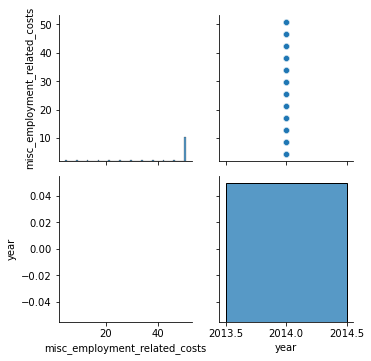

In [485]:
g = sns.PairGrid(df)

# Define the upper and lower plots
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)